<a href="https://colab.research.google.com/github/clobos/Bioestatistica_ESALQ_Python_2025/blob/main/Aula03_Bioestatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisão da aula 2

O que vocês lembram da aula anterior?

# Aula nova!

In [117]:
import numpy as np
import statistics as stats

# Conjuntos de dados
conjunto_a = [5, 5, 5, 10, 20]
conjunto_b = [4, 5, 5, 11, 20]
conjunto_c = [3, 5, 5, 12, 20]

# Lista com todos os conjuntos para iterar
dados = {'Conjunto A': conjunto_a, 'Conjunto B': conjunto_b, 'Conjunto C': conjunto_c}

print(dados)


{'Conjunto A': [5, 5, 5, 10, 20], 'Conjunto B': [4, 5, 5, 11, 20], 'Conjunto C': [3, 5, 5, 12, 20]}


## Calcular e exibir as medidas para cada conjunto

In [118]:
for nome, dados in dados.items():
    media = np.mean(dados)
    mediana = np.median(dados)

    # A moda pode ter mais de um valor, então a biblioteca retorna uma lista
    try:
        moda = stats.mode(dados)
    except stats.StatisticsError:
        # Lida com o caso de não haver moda única
        moda = "Não há uma moda única"

    print(f"--- {nome} ---")
    print(f"Dados: {dados}")
    print(f"Média: {media}")
    print(f"Mediana: {mediana}")
    print(f"Moda: {moda}\n")

--- Conjunto A ---
Dados: [5, 5, 5, 10, 20]
Média: 9.0
Mediana: 5.0
Moda: 5

--- Conjunto B ---
Dados: [4, 5, 5, 11, 20]
Média: 9.0
Mediana: 5.0
Moda: 5

--- Conjunto C ---
Dados: [3, 5, 5, 12, 20]
Média: 9.0
Mediana: 5.0
Moda: 5



In [119]:
import matplotlib.pyplot as plt
import numpy as np

min_val = min(min(conjunto_a), min(conjunto_b), min(conjunto_c))
print(min_val)

3


In [120]:
max_val = max(max(conjunto_a), max(conjunto_b), max(conjunto_c))
print(max_val)

20


## Gráficos de dispersão

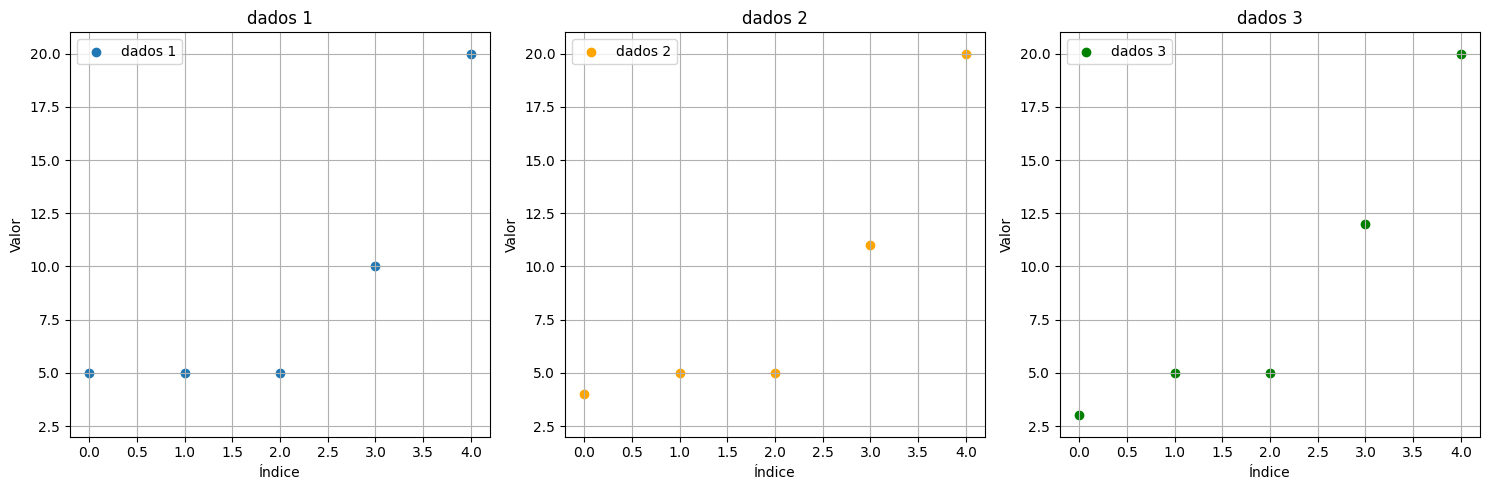

In [121]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(range(len(conjunto_a)), conjunto_a, label='dados 1')
plt.ylim([min_val - 1, max_val + 1])
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("dados 1")
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 2)
plt.scatter(range(len(conjunto_b)), conjunto_b, label='dados 2', color='orange')
plt.ylim([min_val - 1, max_val + 1])
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("dados 2")
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(len(conjunto_c)), conjunto_c, label='dados 3', color='green')
plt.ylim([min_val - 1, max_val + 1])
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("dados 3")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [122]:
print("dados 1:")
print("Variância:", np.var(conjunto_a, ddof =1))

dados 1:
Variância: 42.5


In [123]:
print("dados 2:")
print("Variância:", np.var(conjunto_b, ddof =1))


dados 2:
Variância: 45.5


In [124]:
print("dados 3:")
print("Variância:", np.var(conjunto_c, ddof =1))

dados 3:
Variância: 49.5


# Calculo da variância (manualmente)

In [125]:
variancia_conjunto_a = np.sum((conjunto_a-np.mean(conjunto_a))**2)/(len(conjunto_a)-1)

print(variancia_conjunto_a)

42.5


In [126]:
import numpy as np

dados = {'Conjunto A': conjunto_a, 'Conjunto B': conjunto_b, 'Conjunto C': conjunto_c}

print(dados)


{'Conjunto A': [5, 5, 5, 10, 20], 'Conjunto B': [4, 5, 5, 11, 20], 'Conjunto C': [3, 5, 5, 12, 20]}


In [127]:
print(type(dados.items()))

<class 'dict_items'>


In [128]:
for nome, dados in dados.items():

    Amplitude = np.max(dados) - np.min(dados)

    Variancia = np.var(dados, ddof=1)

    Desvio_Padrao = np.std(dados, ddof=1)

    print(f"--- {nome} ---")
    print(f"Amplitude: {Amplitude}")
    print(f"Variância: {Variancia:.2f}")
    print(f"Desvio Padrão: {Desvio_Padrao:.2f}\n")

--- Conjunto A ---
Amplitude: 15
Variância: 42.50
Desvio Padrão: 6.52

--- Conjunto B ---
Amplitude: 16
Variância: 45.50
Desvio Padrão: 6.75

--- Conjunto C ---
Amplitude: 17
Variância: 49.50
Desvio Padrão: 7.04



# Cenário do Experimento: Efeito de um Novo Fertilizante em Plantas de Soja

Um **biólogo** queria testar o efeito de um novo fertilizante no crescimento de plantas de soja. Ele dividiu 30 plantas em três grupos: um grupo controle (sem fertilizante), um grupo com fertilizante padrão e um grupo com o novo fertilizante. Após 45 dias, ele mediu várias características das plantas.

# Dados para estudar na aula

* id: ID da Planta
* tratamento: Grupo de Tratamento
* tipo_solo: Tipo de Solo
* ph: pH do Solo
* altura: Altura (cm)
* peso_folhagem: Peso da Folhagem (g)
* numero_vagens: Número de Vagens
* qualidade_folhagem: Qualidade da Folhagem


In [129]:
import pandas as pd
import numpy as np

dados = pd.read_csv("/content/soja.csv", encoding= "latin-1")
dados = dados.drop('id', axis=1)
dados.head()

,tratamento,tipo_solo,ph,altura,peso,numero_vagens,qualidade_folhagem
0,Controle,Argiloso,6.5,45.2,55.8,12,Baixa
1,Padrão,Arenoso,6.8,58.9,72.1,18,Média
2,Novo Fertilizante,Húmus,7.1,75.4,95.5,25,Alta
3,Controle,Argiloso,6.4,48.1,60.3,14,Baixa
4,Padrão,Arenoso,6.7,62.5,78.2,20,Média


# Medidas de variabilidade

Determine a amplitude, variância e desvio padrão das variáveis Peso da Folhagem (g) e Número de Vagens. Qual das duas variáveis em estudo possui maior variabilidade?


In [130]:
# Amplitude

In [131]:
# Variância

In [132]:
# Desvio padrão

# Medidas de posição

Determine o **Q1, Q2, Q3** para a variável **Peso da Folhagem**. Interprete os resultados.

In [133]:
# Q1

In [134]:
# Q2

In [135]:
# Q3

In [136]:
# IQR

In [137]:
# Q1 - 1.5*IQR

In [138]:
# Q3 + 1.5*IQR

# Boxplot (gráfico de caixas-e-bigodes)

Faça um boxplot para a variável **Peso da Folhagem**. Interprete os resultados.